In [1]:
import re,sys,os,numpy as np, pandas as pd
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Convolution2D, Activation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import wandb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import seaborn as sns
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC



In [61]:
def get_train_data():

    train_images = []
    train_labels = []
    
    img_path= "../project/data/normal/train/"
    #img_path= "../project/data/pneumonia/train/"
    
    dirss = os.listdir(img_path)
    
    for item in dirss:
        if(item=='desktop.ini'):continue
        #print((img_path+item))
        if os.path.isfile(img_path+item):
         #   print(item)
            img_name=img_path+item
            label, filename,img_no = item.split('_')
            filename=filename+img_no
            #print(filename)
            img=cv2.imread(img_name)
            
            train_images.append(img)
            if label=="fake":
                train_labels.append(0)
            elif label=="real":
                train_labels.append(1)
            
    train_images = np.array(train_images)    
    train_labels = np.array(train_labels)
    #print(train_images)
    #print(train_labels)
    return train_images, train_labels
      





In [62]:
def get_test_data():

    test_images = []
    test_labels = []
    
    
    img_path= "../project/data/normal/test/"
    #img_path= "../project/data/pneumonia/test/"
    
    dirss = os.listdir(img_path)
     
    for item in dirss:
        if(item=='desktop.ini'):continue
        
        if os.path.isfile(img_path+item):
            #print(item)
            img_name=img_path+item
            label, filename,img_no = item.split('_')
            filename=filename+img_no
            #print(filename)
            img=cv2.imread(img_name)
            
            test_images.append(img)
            if label=="fake":
                test_labels.append(0)
            elif label=="real":
                test_labels.append(1)
            
    test_images = np.array(test_images)    
    test_labels = np.array(test_labels)
    #print(test_images)
    #print(test_labels)
    return test_images, test_labels
      
    





In [63]:
def get_val_data():

    val_images = []
    val_labels = []
    
    
    img_path= "../project/data/normal/val/"
    #img_path= "../project/data/pneumonia/val/"
    
    dirss = os.listdir(img_path)
     
    for item in dirss:
        #print((img_path+item))
        if os.path.isfile(img_path+item):
            #print(item)
            img_name=img_path+item
            label, filename,img_no = item.split('_')
            filename=filename+img_no
            #print(filename)
            img=cv2.imread(img_name)
            
            val_images.append(img)
            if label=="fake":
                val_labels.append(0)
            elif label=="real":
                val_labels.append(1)
            
    val_images = np.array(val_images)    
    val_labels = np.array(val_labels)
    #print(val_images)
    #print(val_labels)
    return val_images, val_labels
      
    


Epoch 1/20
113/113 [==============================] - 3s 23ms/step - loss: 0.8812 - accuracy: 0.9688
Epoch 2/20
113/113 [==============================] - 2s 21ms/step - loss: 0.0840 - accuracy: 0.9822
Epoch 3/20
113/113 [==============================] - 3s 23ms/step - loss: 0.0770 - accuracy: 0.9831
Epoch 4/20
113/113 [==============================] - 2s 21ms/step - loss: 0.0705 - accuracy: 0.9822
Epoch 5/20
113/113 [==============================] - 3s 22ms/step - loss: 0.0613 - accuracy: 0.9866
Epoch 6/20
113/113 [==============================] - 2s 21ms/step - loss: 0.0417 - accuracy: 0.9866
Epoch 7/20
113/113 [==============================] - 2s 21ms/step - loss: 0.0423 - accuracy: 0.9893
Epoch 8/20
113/113 [==============================] - 2s 21ms/step - loss: 0.0190 - accuracy: 0.9946 0s - los
Epoch 9/20
113/113 [==============================] - 2s 22ms/step - loss: 0.0033 - accuracy: 0.9991
Epoch 10/20
113/113 [==============================] - 2s 22ms/step - loss: 0.0034

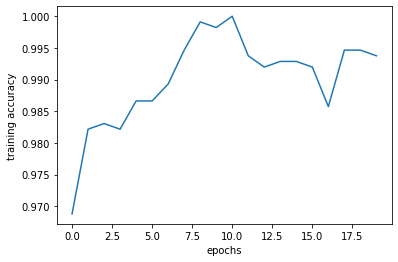

[[239 161]
 [  0 400]]


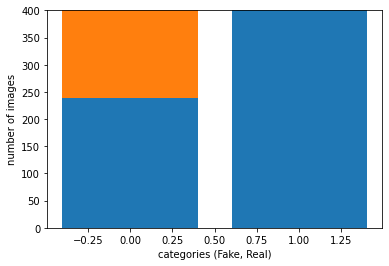

In [59]:
def cnn():
     
    train_data,train_labels=get_train_data()
    test_data,test_labels=get_test_data()
    #val_data,val_labels=get_val_data()
   
    train_data = train_data.reshape(train_data.shape[0], 64, 64, 3)
    test_data = test_data.reshape(test_data.shape[0], 64, 64, 3)
   
    model=Sequential()
    
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same', input_shape=(64,64,3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(25, activation='softmax'))

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history= model.fit(train_data,train_labels,epochs=20,batch_size=10,verbose=1)
    
    predictions = model.predict(test_data)
    
    # predicted labels
    y_pred = np.argmax(predictions, axis=1)
    
    test_loss, test_acc = model.evaluate(test_data,test_labels,verbose=0)
    
    
    print("CNN Accuracy=",test_acc*100)

    plt.plot(history.history['accuracy'])
    plt.xlabel('epochs')
    plt.ylabel('training accuracy')
    plt.show()
    
    matrix = confusion_matrix(test_labels, y_pred)
    print(matrix)
    data1=[]
    data2=[]
    for i in range(2):
        total=0
        for j in range(2):
            
            if i==j:
                data1.append(matrix[i][j])
            elif matrix[i][j]!=0:
                total=total+matrix[i][j]
        data2.append(total)
    
    plt.bar(range(len(data1)), data1)
    plt.bar(range(len(data2)), data2, bottom=data1)
    plt.xlabel('categories (Fake, Real)')
    plt.ylabel('number of images')
    plt.show()
    
    
cnn()

KNN Accuracy= 57.833333333333336
[[ 94 506]
 [  0 600]]


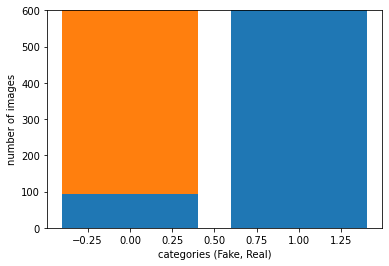

In [64]:
def knn():
    
    model = KNeighborsClassifier(n_neighbors=3)

    train_data,train_labels=get_train_data()
    test_data,test_labels=get_test_data()
    val_data,val_labels=get_val_data()

    train_data=train_data.reshape(train_data.shape[0],-1)
    test_data=test_data.reshape(test_data.shape[0],-1)

    model.fit(train_data,train_labels)
    test_acc = model.score(test_data,test_labels)
    y_pred = model.predict(test_data)
        
    print("KNN Accuracy=",test_acc*100)
    matrix = confusion_matrix(test_labels, y_pred)
    
    data1=[]
    data2=[]
    for i in range(2):
        total=0
        for j in range(2):
            
            if i==j:
                data1.append(matrix[i][j])
            elif matrix[i][j]!=0:
                total=total+matrix[i][j]
        data2.append(total)
    print(matrix)
    plt.bar(range(len(data1)), data1)
    plt.bar(range(len(data2)), data2, bottom=data1)
    plt.xlabel('categories (Fake, Real)')
    plt.ylabel('number of images')
    plt.show()
    
knn()

              precision    recall  f1-score   support

           0       1.00      0.52      0.68       600
           1       0.67      1.00      0.81       600

    accuracy                           0.76      1200
   macro avg       0.84      0.76      0.74      1200
weighted avg       0.84      0.76      0.74      1200

0.7583333333333333
The model is 75.83333333333333% accurate
[[310 290]
 [  0 600]]


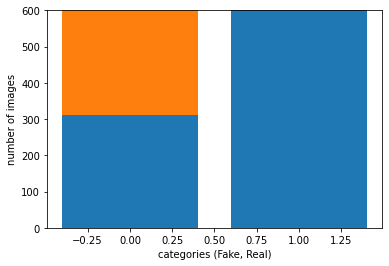

In [65]:
def svm():
    from sklearn import svm

    train_data,train_labels=get_train_data()
    test_data,test_labels=get_test_data()
    val_data,val_labels=get_val_data()

    train_data=train_data.reshape(train_data.shape[0],-1)
    test_data=test_data.reshape(test_data.shape[0],-1)

    clf = svm.SVC(kernel='linear', C=1,gamma=1)
    clf.fit(train_data, train_labels)
    y_pred = clf.predict(test_data)
    cm = confusion_matrix(test_labels,y_pred)
    print(classification_report(test_labels,y_pred))
    print(clf.score(test_data,test_labels))

    print(f"The model is {accuracy_score(y_pred,test_labels)*100}% accurate")


    matrix = confusion_matrix(test_labels, y_pred)
    print(matrix)
    data1=[]
    data2=[]
    for i in range(2):
        total=0
        for j in range(2):

            if i==j:
                data1.append(matrix[i][j])
            elif matrix[i][j]>0:
                total=total+matrix[i][j]
        data2.append(total)

    plt.bar(range(len(data1)), data1)
    plt.bar(range(len(data2)), data2, bottom=data1)
    plt.xlabel('categories (Fake, Real)')
    plt.ylabel('number of images')
    plt.show()
    
svm()



0.3157053333333334
The model is 76.75% accurate
[[321 279]
 [  0 600]]


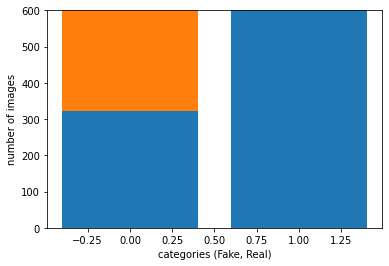

In [66]:
def rf():

    train_data,train_labels=get_train_data()
    test_data,test_labels=get_test_data()
    val_data,val_labels=get_val_data()

    train_data=train_data.reshape(train_data.shape[0],-1)
    test_data=test_data.reshape(test_data.shape[0],-1)

    rf = RandomForestRegressor(n_estimators=50,random_state = 33)
    rf.fit(train_data, train_labels)
    y_pred = rf.predict(test_data)
    #print(y_pred)

    for i in range(len(y_pred)):
        y_pred[i]=round(y_pred[i])

    #print(y_pred)

    print(rf.score(test_data,test_labels))


    print(f"The model is {accuracy_score(y_pred,test_labels)*100}% accurate")


    matrix = confusion_matrix(test_labels, y_pred)
    print(matrix)
    data1=[]
    data2=[]
    for i in range(2):
        total=0
        for j in range(2):

            if i==j:
                data1.append(matrix[i][j])
            elif matrix[i][j]>0:
                total=total+matrix[i][j]
        data2.append(total)

    plt.bar(range(len(data1)), data1)
    plt.bar(range(len(data2)), data2, bottom=data1)
    plt.xlabel('categories (Fake, Real)')
    plt.ylabel('number of images')
    plt.show()
    
rf()



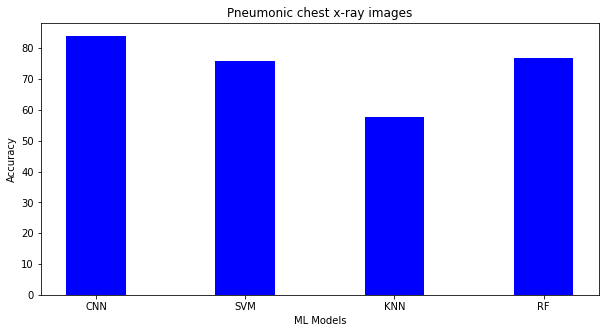

In [78]:
#data = {'CNN':79.87, 'SVM':94.75, 'KNN':78.25, 'RF':83.37}
data = {'CNN':83.99, 'SVM':75.83, 'KNN':57.83, 'RF':76.75}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.title("Pneumonic chest x-ray images")

plt.show()